u[1, :] = [ 0.9 -0.9], error = [0.00483742 0.00483742]
u[2, :] = [ 0.81 -0.81], error = [0.00873075 0.00873075]
u[3, :] = [ 0.729 -0.729], error = [0.01181822 0.01181822]
u[4, :] = [ 0.6561 -0.6561], error = [0.01422005 0.01422005]
u[5, :] = [ 0.59049 -0.59049], error = [0.01604066 0.01604066]
u[6, :] = [ 0.531441 -0.531441], error = [0.01737064 0.01737064]
u[7, :] = [ 0.4782969 -0.4782969], error = [0.0182884 0.0182884]
u[8, :] = [ 0.43046721 -0.43046721], error = [0.01886175 0.01886175]
u[9, :] = [ 0.38742049 -0.38742049], error = [0.01914917 0.01914917]
u[10, :] = [ 0.34867844 -0.34867844], error = [0.019201 0.019201]
u[11, :] = [ 0.3138106 -0.3138106], error = [0.01906049 0.01906049]
u[12, :] = [ 0.28242954 -0.28242954], error = [0.01876468 0.01876468]
u[13, :] = [ 0.25418658 -0.25418658], error = [0.01834521 0.01834521]
u[14, :] = [ 0.22876792 -0.22876792], error = [0.01782904 0.01782904]
u[15, :] = [ 0.20589113 -0.20589113], error = [0.01723903 0.01723903]
u[16, :] = [ 0.18530202

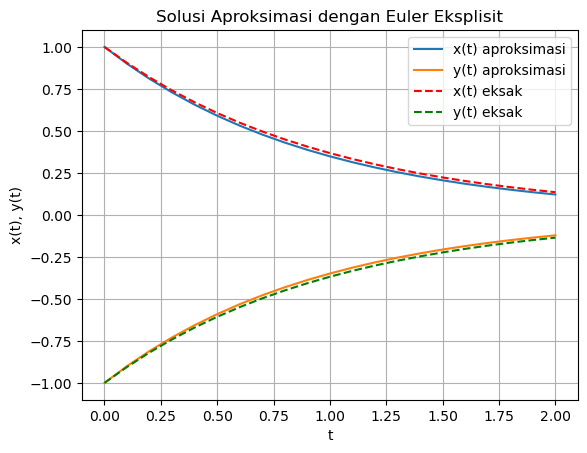

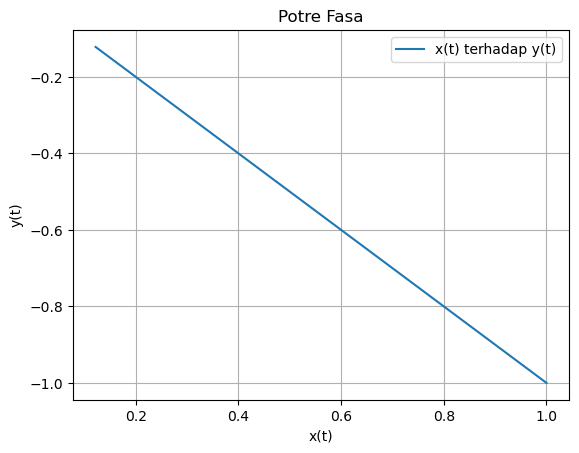

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi dx/dt dan dy/dt
def dxdy(u):
    x, y = u
    dx = x + 2 * y
    dy = 2 * x + y
    return np.array([dx, dy])

# Euler Eksplisit untuk sistem persamaan diferensial
def euler_explicit(u0, t0, tn, h, N, u_exact):
    t = np.arange(t0, tn+h, h)  # Waktu dari t0 hingga tn dengan langkah h
    u = np.zeros((len(t), 2))  # Matriks untuk menyimpan nilai [x, y] di setiap langkah
    u[0, :] = u0  # Inisialisasi nilai awal

    for n in range(N):
        u[n+1, :] = u[n, :] + h * dxdy(u[n, :])  # Metode Euler Eksplisit
        error = np.abs(u_exact[:, n+1] - u[n+1, :])  # Error dihitung antara u_exact dan aproksimasi

        print(f"u[{n+1}, :] = {u[n+1, :]}, error = {error}")

    return t, u

# Parameter simulasi
x0 = 1
y0 = -1
u0 = np.array([x0, y0])
t0 = 0
tn = 2
N = 20
h = (tn - t0) / N

# Solusi eksak
t_exact = np.arange(t0, tn+h, h)
x_exact = np.exp(-t_exact)
y_exact = -np.exp(-t_exact)
u_exact = np.array([x_exact, y_exact])

# Menghitung solusi dengan Euler Eksplisit
t, u = euler_explicit(u0, t0, tn, h, N, u_exact)

# Plot solusi aproksimasi


# Plot solusi eksak untuk perbandingan


# Mengatur grafik
#plt.title('Solusi Aproksimasi dengan Euler Eksplisit')
#plt.xlabel('t')
#plt.ylabel('x(t), y(t)')
#plt.legend()
#plt.grid(True)
#plt.show()

# Plot pertama
plt.figure()
plt.plot(t, u[:, 0], label='x(t) aproksimasi')
plt.plot(t, u[:, 1], label='y(t) aproksimasi')
plt.plot(t, x_exact, 'r--', label='x(t) eksak')
plt.plot(t, y_exact, 'g--', label='y(t) eksak')
plt.title('Solusi Aproksimasi dengan Euler Eksplisit')
plt.xlabel('t')
plt.ylabel('x(t), y(t)')
plt.legend()
plt.grid(True)

# Plot kedua
plt.figure()
plt.plot( u[:, 0], u[:, 1], label='x(t) terhadap y(t)')
plt.title('Potre Fasa')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)

# Tampilkan kedua plot
plt.show()




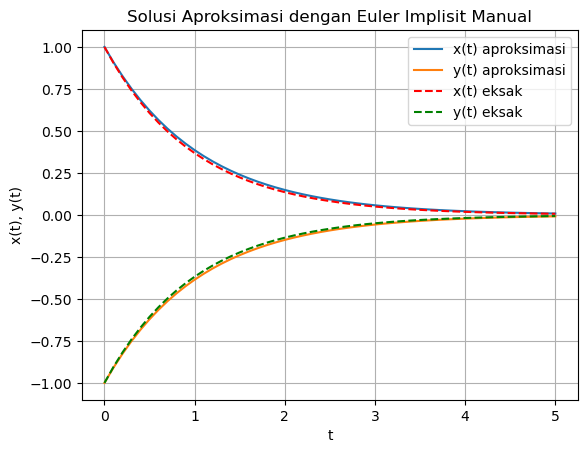

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk Euler Implisit 
def euler_implicit(u0, t0, tn, h, N):
    t = np.arange(t0, tn + h, h)  # Waktu dari t0 hingga tn dengan langkah h
    u = np.zeros((len(t), 2))  # Matriks untuk menyimpan nilai [x, y] di setiap langkah, '2' : 2 kolom
    u[0, :] = u0  # Inisialisasi nilai awal

    for n in range(N):
        x_n, y_n = u[n, :]  # Nilai x^n dan y^n

        '''
        tidak bisa langsung u[n+1, :] = u[n, :] + h * dxdy(u[n+1, :]) karena dikedua ruas terdapat u[n+1, :] yang
        akan membuat program error
        ''' 
        
        # Hitung y^{n+1} -> didapat menggunakan penyelesaian SPL (substitusi)
        y_n1 = ((1 - h) * y_n + 2 * h * x_n) / ((1 - h)**2 - 4 * h**2)
        
        # Hitung x^{n+1} -> didapat menggunakan penyelesaian SPL (subtsitusi)
        x_n1 = (x_n + 2 * h * y_n1) / (1 - h)

        # Simpan nilai x^{n+1} dan y^{n+1}
        u[n+1, :] = [x_n1, y_n1]

    return t, u

# Parameter simulasi
x0 = 1
y0 = -1
u0 = np.array([x0, y0])
t0 = 0
tn = 2
N = 20
h = (tn-t0)/N

# Menghitung solusi dengan Euler Implisit Manual
t, u = euler_implicit(u0, t0, tn, h, N)

# Plot solusi aproksimasi
plt.plot(t, u[:, 0], label='x(t) aproksimasi')
plt.plot(t, u[:, 1], label='y(t) aproksimasi')

# Plot solusi eksak untuk perbandingan
x_exact = np.exp(-t)
y_exact = -np.exp(-t)
plt.plot(t, x_exact, 'r--', label='x(t) eksak')
plt.plot(t, y_exact, 'g--', label='y(t) eksak')

# Mengatur grafik
plt.title('Solusi Aproksimasi dengan Euler Implisit Manual')
plt.xlabel('t')
plt.ylabel('x(t), y(t)')
plt.legend()
plt.grid(True)
plt.show()


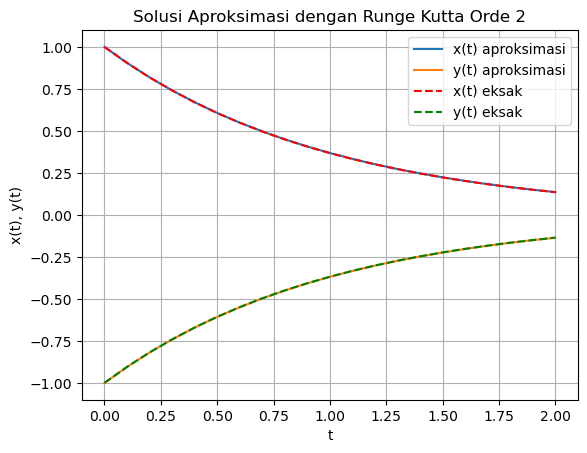

In [37]:
import numpy as np

def runge_kutta_2(dxdy, u0, t0, tn, h, N):
    t = np.arange(t0, tn + h, h)  # Waktu dari t0 hingga t_end dengan langkah h
    u = np.zeros((len(t), len(u0)))  # Matriks untuk menyimpan nilai [x, y] di setiap langkah
    u[0, :] = u0  # Inisialisasi nilai awal

    # Iterasi Runge-Kutta 2
    for n in range(N):
        # Hitung k1
        k1 = h * dxdy(u[n, :])

        # Hitung k2
        k2 = h * dxdy(u[n, :] + k1)

        # Perbarui nilai u[n+1] dengan k2
        u[n+1, :] = u[n, :] + ((k2 + k1)/2)

    return t, u

# Contoh penggunaan dengan sistem dx/dt = x + 2y, dy/dt = 2x + y
def dxdy(u):
    x, y = u
    dx = x + 2*y
    dy = 2*x + y
    return np.array([dx, dy])

# Parameter simulasi
x0 = 1
y0 = -1
u0 = np.array([x0, y0])
t0 = 0
tn = 2
N = 20
h = (tn-t0)/N

t, u = runge_kutta_2(dxdy, u0, t0, tn, h, N)

# Plot solusi aproksimasi
plt.plot(t, u[:, 0], label='x(t) aproksimasi')
plt.plot(t, u[:, 1], label='y(t) aproksimasi')

# Plot solusi eksak untuk perbandingan
x_exact = np.exp(-t)
y_exact = -np.exp(-t)
plt.plot(t, x_exact, 'r--', label='x(t) eksak')
plt.plot(t, y_exact, 'g--', label='y(t) eksak')

# Mengatur grafik
plt.title('Solusi Aproksimasi dengan Runge Kutta Orde 2')
plt.xlabel('t')
plt.ylabel('x(t), y(t)')
plt.legend()
plt.grid(True)
plt.show()


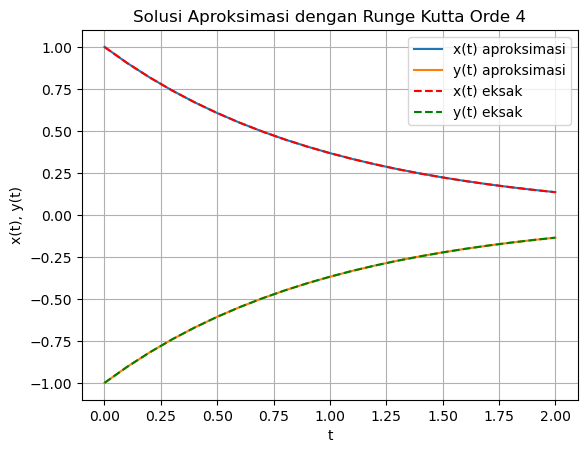

In [45]:
import numpy as np

def runge_kutta_4(dxdy, u0, t0, tn, h, N):
    t = np.arange(t0, tn + h, h)  # Waktu dari t0 hingga t_end dengan langkah h
    u = np.zeros((len(t), len(u0)))  # Matriks untuk menyimpan nilai [x, y] di setiap langkah
    u[0, :] = u0  # Inisialisasi nilai awal

    # Iterasi Runge-Kutta 2
    for n in range(N):
        # Hitung k1
        k1 = h * dxdy(u[n, :])

        # Hitung k2
        k2 = h * dxdy(u[n, :] + (k1/2))

        # Hitung k3
        k3 = h * dxdy(u[n, :] + (k2/2))

        # Hitung k4
        k4 = h * dxdy(u[n, :] + (k3))
                      
        # Perbarui nilai u[n+1] dengan k1,k2,k3,k4
        u[n+1, :] = u[n, :] + (1/6)*(k1 + (2*k2) + (2*k3)  + k4)

    return t, u

# Contoh penggunaan dengan sistem dx/dt = x + 2y, dy/dt = 2x + y
def dxdy(u):
    x, y = u
    dx = x + 2*y
    dy = 2*x + y
    return np.array([dx, dy])

# Parameter simulasi
x0 = 1
y0 = -1
u0 = np.array([x0, y0])
t0 = 0
tn = 2
N = 20
h = (tn-t0)/N

t, u = runge_kutta_4(dxdy, u0, t0, tn, h, N)

# Plot solusi aproksimasi
plt.plot(t, u[:, 0], label='x(t) aproksimasi')
plt.plot(t, u[:, 1], label='y(t) aproksimasi')

# Plot solusi eksak untuk perbandingan
x_exact = np.exp(-t)
y_exact = -np.exp(-t)
plt.plot(t, x_exact, 'r--', label='x(t) eksak')
plt.plot(t, y_exact, 'g--', label='y(t) eksak')

# Mengatur grafik
plt.title('Solusi Aproksimasi dengan Runge Kutta Orde 4')
plt.xlabel('t')
plt.ylabel('x(t), y(t)')
plt.legend()
plt.grid(True)
plt.show()


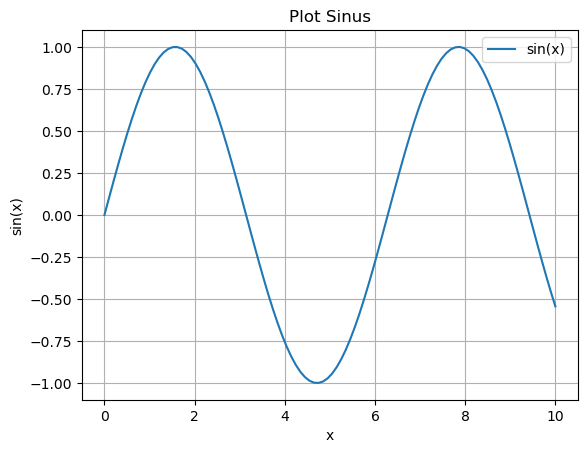

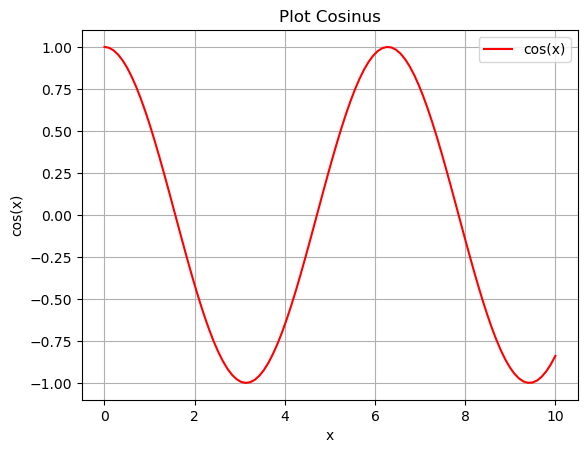

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Data untuk plot pertama
x1 = np.linspace(0, 10, 100)
y1 = np.sin(x1)

# Data untuk plot kedua
x2 = np.linspace(0, 10, 100)
y2 = np.cos(x2)

# Plot pertama
plt.figure()
plt.plot(x1, y1, label='sin(x)')
plt.title('Plot Sinus')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.grid(True)

# Plot kedua
plt.figure()
plt.plot(x2, y2, label='cos(x)', color='r')
plt.title('Plot Cosinus')
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.legend()
plt.grid(True)

# Tampilkan kedua plot
plt.show()
